# Make depth summary figures

This notebook is to produce some depth summary figures for the main HELP paper

We use the full sky depth map produced in dmu32/dmu32_AllSky/



In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))


This notebook was run with herschelhelp_internal version: 
1407877 (Mon Feb 4 12:56:29 2019 +0000)


In [2]:
import pyvo as vo
import glob
import time
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import random

import herschelhelp as hh
from herschelhelp_internal.utils import flux_to_mag

from astropy.table import Table, Column, vstack, join, unique

from pymoc import MOC

import pandas as pd

import yaml

from pcigale.sed import SED
from pcigale.sed_modules import get_module

In [161]:
depths = Table.read('../../../dmu32/dmu32_AllSky/data/all_sky_depth_map.fits')[
    'hp_idx_O_10',
    'ferr_u_mean',
    'ferr_g_mean',
    'ferr_r_mean',
    'ferr_i_mean',
    'ferr_z_mean',
    'ferr_y_mean',
    'ferr_j_mean',
    'ferr_h_mean',
    'ferr_k_mean',
    'ferr_ks_mean',
    'ferr_irac_i1_mean',
    'ferr_irac_i2_mean',
    'ferr_irac_i3_mean',
    'ferr_irac_i4_mean',
    'ferr_mips_24_mean',
    'ferr_pacs_green_mean',
    'ferr_pacs_red_mean',
    'ferr_spire_250_mean',
    'ferr_spire_350_mean',
    'ferr_spire_500_mean'
]

In [162]:
for c in depths.colnames:
    if c.startswith('ferr_'):
        mask = depths[c]>1.e15
        depths[c][mask] = np.nan

In [163]:
depths.write('./data/depths_reduced.fits',overwrite=True)

In [23]:
len(depths)

788596

In [28]:
np.sum(depths['ferr_pacs_red_mean']>0)

205857

(array([1.3700e+03, 3.8400e+03, 1.2279e+04, 3.4013e+04, 5.9448e+04,
        7.6686e+04, 6.8770e+03, 3.5580e+03, 3.3290e+03, 1.6490e+03,
        4.6000e+02, 2.2000e+02, 1.8200e+02, 2.0000e+02, 4.3000e+02,
        3.4200e+02, 1.7800e+02, 7.0000e+01, 5.0000e+01, 6.0000e+01,
        2.8000e+01, 3.6000e+01, 3.0000e+01, 4.8000e+01, 3.0000e+01,
        3.4000e+01, 2.4000e+01, 1.4000e+01, 1.2000e+01, 3.0000e+01,
        1.2000e+01, 1.0000e+01, 2.0000e+01, 1.8000e+01, 1.4000e+01,
        1.2000e+01, 1.8000e+01, 1.0000e+01, 8.0000e+00, 4.0000e+00,
        1.4000e+01, 2.0000e+00, 1.0000e+01, 4.0000e+00, 4.0000e+00,
        2.0000e+00, 6.0000e+00, 6.0000e+00, 1.4000e+01, 6.0000e+00,
        4.0000e+00, 1.0000e+01, 6.0000e+00, 1.0000e+01, 2.0000e+00,
        0.0000e+00, 8.0000e+00, 2.0000e+00, 6.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 4.0000e+00,
        0.0000e+00, 8.0000e+00, 4.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 0.0000e+00, 2.00

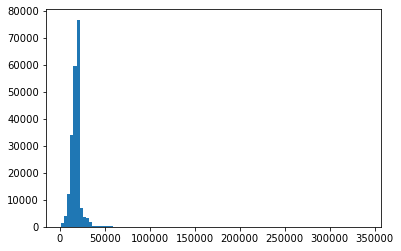

In [30]:
plt.hist(depths['ferr_pacs_red_mean'],bins=100)

## Plot general overview of depths

In [17]:
bands = ['u', 'g', 'r', 'i', 'z', 'y',
        'j', 'h', 'k', 'ks',
        'irac_i1', 'irac_i2', 'irac_i3', 'irac_i4', 
        'mips_24', 'pacs_green', 'pacs_red', 'spire_250', 'spire_350', 'spire_500'
        ]

In [6]:
bands_fir = ['u', 'g', 'r', 'i', 'z', 'y', 'J', 'H', 'K', 'Ks', 'i1', 'i2', 'i3', 'i4', 
             '24', '100', '160', '250', '350', '500']

In [7]:
#s.add_contribution("HELP_SED", orig_spec['WAVE'], orig_spec['LUMIN'])

In [8]:
cigale_filternames = {
    'u':  'u_prime',
    'g':  'MCam_g',
    'r':  'MCam_r',
    'i':  'MCam_i',
    'z':  'MCam_z',
    'y':  'WFCAM_Y',
    'J':  'WFCAM_J',
    'H':  'WFI_H',
    'K':  'WFI_K',
    'Ks': 'Ks_2mass',
    'i1': 'IRAC1',
    'i2': 'IRAC2',
    'i3': 'IRAC3',
    'i4': 'IRAC4'
}

In [9]:



gal1 = './data/HELP_J095946.083p021914.438_best_model.fits'
gal2 = './data/HELP_J100130.443p020929.494_best_model.fits'
gal3 = './data/HELP_J095809.302p013203.775_best_model.fits'
gal4 = './data/HELP_J095822.986p013145.336_best_model.figs'
gal5 = './data/HELP_J003412.527-441056.846_best_model.fits'  #z=4
gal6 = './data/HELP_J095738.934+021508.530_best_model.fits' #From hedam - high fluxes
gal7 = './data/HELP_J095818.598+013057.910_best_model.fits'
gal8 = './data/HELP_J095809.488+013225.513_best_model.fits'
gal9 = './data/HELP_J100108.952+022730.528_best_model.fits'
orig_spec = Table.read(gal9)
        
s = SED()
    # This is wrong because the best SED we get from CIGALE is redshifted (written by Yannick)
s.add_contribution("HELP_SED", orig_spec['wavelength'], orig_spec['L_lambda_total'])
    
#z=1
zs = np.arange(1, 5, 1)




In [10]:
gal_fluxes = np.full([len(zs), len(bands)], np.nan)

z = 1:
z = 2:
z = 3:
z = 4:


(-7, 0)

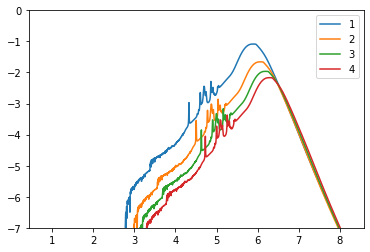

In [11]:
fig, ax = plt.subplots()
for n, z in enumerate(zs):
    print('z = {}:'.format(z))
    sed = s.copy()
    mod = get_module("redshifting", redshift=z)
    mod.process(sed)
    ax.plot(np.log10(sed.wavelength_grid), np.log10(sed.fnu * 1.e-3), label=str(z))
#ax.plot(np.log10(orig_spec['wavelength']), np.log10(orig_spec['Fnu']))

plt.legend()
ax.set_ylim(-7, 0)
#ax.set_xlim(0, 14.75)

z = 1:
z = 2:
z = 3:
z = 4:


(2, 7)

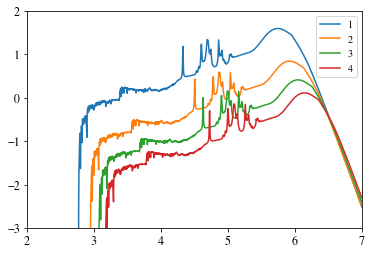

In [40]:
fig, ax = plt.subplots()
for n, z in enumerate(zs):
    print('z = {}:'.format(z))
    sed = s.copy()
    mod = get_module("redshifting", redshift=z)
    mod.process(sed)
    ax.plot(np.log10(sed.wavelength_grid), np.log10((3.e8/ sed.wavelength_grid) *sed.fnu * 1.e-3), label=str(z))
#ax.plot(np.log10(orig_spec['wavelength']), np.log10(orig_spec['Fnu']))

plt.legend()
ax.set_ylim(-3, 2)
ax.set_xlim(2, 7)

In [12]:
pos = [3561.,     #u  (SDSS)
       4866.,     #g  (GPC1)
       6215.,     #r  (GPC1)
       7545.,     #i  (GPC1)
       8680.,     #z  (GPC1)
       9633.,     #y  (GPC1)
       12510.,    #J  (UKIRT)
       16377.,    #H  (UKIRT)
       22081.,    #K   (UKIRT)
       21496.,    #Ks (WIRCam)
       36000.,    #i1
       45000.,    #i2 
       56000.,    #i3
       80000.,    #i4
       240000.,    #mips_24
       1000000.,    #pacs_100
       1600000.,    #pacs_160
       2500000.,    #spire_250
       3500000.,    #spire_350
       5000000.,    #spire_500
      ]   
fwhms = [
       [3048., 4028.],     #u  (SDSS)
       [3943., 5593.],     #g  (GPC1)
       [5386., 7036.],     #r  (GPC1)
       [6778., 8304.],     #i  (GPC1)
       [8028., 9346.],     #z  (GPC1)
       [9100., 10838.],     #y  (GPC1)
       [11690., 13280],     #J  (UKIRT)
       [14920., 17840.],     #H  (UKIRT)
       [20290., 23800.],     #K   (UKIRT)
       [19578., 23431.],     #Ks (WIRCam)
       [31296, 39614 ],     #i1
       [39173, 50561],      #i2 
       [48983, 65089],     #i3
       [62994, 95876],      #i4
       [240000.,340000.],    #mips_24 GUESSES!!!!
       [1000000.,1500000.],    #pacs_100
       [1600000.,1900000.],    #pacs_160
       [2500000.,3000000.],    #spire_250
       [3500000.,4000000.],    #spire_350
       [5000000.,5500000.]    #spire_500
        ]

In [13]:
['${}$'.format(band).replace(
    '$Ks$', '').replace(
    'K', 'K/Ks').replace(
     '100', 'PACS 100/160').replace(
     '160', ' ').replace(
     '250', 'SPIRE 250/350/500').replace(
     '350', ' ').replace(
     '500', ' ') for band in bands_fir]

['$u$',
 '$g$',
 '$r$',
 '$i$',
 '$z$',
 '$y$',
 '$J$',
 '$H$',
 '$K/Ks$',
 '',
 '$i1$',
 '$i2$',
 '$i3$',
 '$i4$',
 '$24$',
 '$PACS 100/ $',
 '$ $',
 '$SPIRE 250/ / $',
 '$ $',
 '$ $']

In [16]:
depths.colnames

['ferr_u_mean',
 'ferr_g_mean',
 'ferr_r_mean',
 'ferr_i_mean',
 'ferr_z_mean',
 'ferr_y_mean',
 'ferr_j_mean',
 'ferr_h_mean',
 'ferr_k_mean',
 'ferr_ks_mean',
 'ferr_irac_i1_mean',
 'ferr_irac_i2_mean',
 'ferr_irac_i3_mean',
 'ferr_irac_i4_mean',
 'ferr_mips_24_mean',
 'ferr_pacs_green_mean',
 'ferr_pacs_red_mean',
 'ferr_spire_250_mean',
 'ferr_spire_350_mean',
 'ferr_spire_500_mean']

In [31]:
#data,logwidths,areas
def depths_sample(band):
    mask = ~np.isnan(depths['ferr_{}_mean'.format(band)])
    mask &= depths['ferr_{}_mean'.format(band)] > 0.
    mask &= depths['ferr_{}_mean'.format(band)] <1.e9
    area = (np.sum(mask)/len(depths)) * 1270.
    return np.log10(np.array(depths['ferr_{}_mean'.format(band)][mask]) *5.e-6 ), area
    

data = [ depths_sample(band)[0] for band in bands ]
areas = [ depths_sample(band)[1] for band in bands ]

In [32]:
depths[:5]

ferr_u_mean,ferr_g_mean,ferr_r_mean,ferr_i_mean,ferr_z_mean,ferr_y_mean,ferr_j_mean,ferr_h_mean,ferr_k_mean,ferr_ks_mean,ferr_irac_i1_mean,ferr_irac_i2_mean,ferr_irac_i3_mean,ferr_irac_i4_mean,ferr_mips_24_mean,ferr_pacs_green_mean,ferr_pacs_red_mean,ferr_spire_250_mean,ferr_spire_350_mean,ferr_spire_500_mean
,,,,,,,,,,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy,uJy
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.5253896117210388,0.03477883338928223,0.05335335433483124,0.07200701534748077,0.10487224906682968,0.2554752230644226,2.602437734603882,3.796893763542175,12.952428817749023,nan,nan,nan,nan,nan,nan,nan,nan,3729.095703125,4072.408447265625,5525.98291015625
0.551311731338501,0.037005715072155,0.0598246268928051,0.08084800839424133,0.11877024918794632,0.30368152260780334,2.950322151184082,3.3016043663024903,11.078862190246582,5.1432225704193115,nan,nan,nan,nan,nan,nan,nan,3686.706787109375,4432.22119140625,5114.5595703125
0.8374801278114319,0.03753457963466644,0.06271658837795258,0.07919932901859283,0.11560878157615662,0.2925579249858856,6.202926296548745,7.503037957821862,11.872732162475586,8.65422657208565,nan,nan,nan,nan,nan,nan,nan,3925.2880859375,3938.692138671875,4882.40625
0.5537455081939697,0.03794214874505997,0.05772425979375839,0.07525596767663956,0.10789532959461212,0.26942846179008484,4.891497351906517,5.117591404914856,10.076924324035645,6.184358044104143,nan,nan,nan,nan,nan,nan,nan,3607.606201171875,3563.78955078125,4160.08447265625
0.48730310797691345,0.04043122008442879,0.05988714098930359,0.08422387391328812,0.12216420471668243,0.29505807161331177,4.336619281768799,4.117823640505473,8.667695999145508,6.11608852039684,nan,nan,nan,nan,nan,nan,nan,3889.661865234375,3670.824462890625,5090.30419921875


In [33]:
areas

[667.1511648550082,
 1268.676204292185,
 1260.5047451419991,
 1260.5015242278682,
 1264.87552561768,
 1238.4253787744294,
 1154.6429604005093,
 1060.4376638988786,
 608.5144231013091,
 744.5948242192454,
 271.0785750878777,
 269.92870874313337,
 65.25894120690442,
 65.16553469710726,
 77.32448554139255,
 303.7064352342644,
 331.5238601260975,
 959.1254203673363,
 957.693724036135,
 918.4484958077394]

In [34]:
widths = [np.max(np.histogram(data[n], bins = 100, density = True)[0])*areas[n] for n in np.arange(len(data)) ]
widths /= np.max(widths)

print(widths)

[0.1654814  0.42277354 0.36740738 0.49213096 0.45162467 0.37342106
 0.41068674 0.38842608 0.46129108 0.3544614  0.13216984 0.14860585
 0.05001667 0.04362704 0.05062409 0.45544736 0.63067878 1.
 0.78339192 0.53963523]


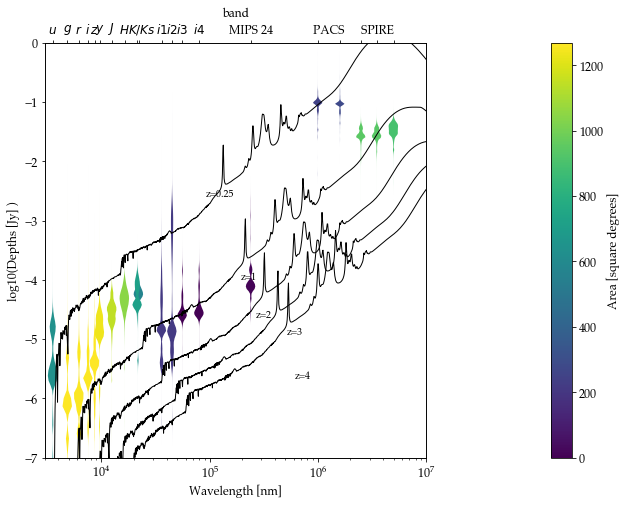

In [47]:
# fake data
fs = 10  # fontsize
# Angstroms     


#data = np.array([np.array(coverage['ferr_ap_{}_mean_min'.format(b)]) for b in bands]).T

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=np.min(areas), vmax=np.max(areas))
scalmap = mpl.cm.ScalarMappable( cmap=cmap, norm=norm)
colors = scalmap.to_rgba(areas)   # The color is the angle
colors[:, 3] = 1

fig, ax = plt.subplots()

ax2 = ax.twiny()

#ax2.set_xlim(3000., 100000)
#ax2.set_xticks(pos)
#ax2.set_xticklabels(['$' + band + '$' for band in bands])
#ax2.set_xlabel('band')
#ax2.set_xscale('log')
ax2.set_xlim(np.log10(3000.), np.log10(10000000))
ax2.set_xticks(np.log10(pos))
ax2.set_xticklabels(['$u$',
 '$g$',
 '$r$',
 '$i$',
 '$z$',
 '$y$',
 '$J$',
 '$H$',
 '  $K/Ks$',
 '',
 '$i1$',
 '$i2$',
 '$i3$',
 '$i4$',
 'MIPS 24',
 '       PACS',
 '',
 '           SPIRE',
 '',
 ''])
ax2.set_xlabel('band')
#ax2.set_xscale('log')


line_styles = [':', '-.', '--', '-']
colours = ['y', 'b', 'g', 'r', 'k']
for n, z in enumerate([0.25, 1, 2, 3, 4]):
    sed = s.copy()
    mod = get_module("redshifting", redshift=z)
    mod.process(sed)
    ax.plot(sed.wavelength_grid*10, 
            np.log10(sed.fnu * 1.e-3),
            c='k',
            #c= colours[n],
            #linestyle = line_styles[n],
            label= 'z = {}'.format(z),
            linewidth=1.0,
            alpha=1.
           )
    for m, band in enumerate(cigale_filternames):
        continue
        if m == 0:
            lab = 'z = {}'.format(z)
        else:
            lab=None
        ax.plot([fwhms[m][0], fwhms[m][1]], [np.log10(gal_fluxes[n, m]   )-3, 
                                     np.log10(gal_fluxes[n, m]   )-3], 
               # c='k',
                c= colours[n],
               #linestyle = line_styles[n],
               label=lab,
                alpha=1.0
               )

        




ax.set_ylabel('log10(Depths [Jy] )')

#ax.set_xticks(pos)
#ax.set_xticklabels(['${}$'.format(band.replace('Ks', '').replace('K', 'K/Ks')) for band in bands])
ax.set_xlim(3000., 10000000)
ax.set_xscale('log')    
ax.set_xlabel('Wavelength [nm]')
ax.set_ylim(-7, 0)
#ax.legend(loc=2)


#widths
log_widths = np.ones(len(pos)) * (pos) * .2# * widths
#log_widths = np.ones(len(pos)) * 1000.
#areas/np.max(areas)
parts = ax.violinplot(data, 
                      positions=pos, 
                      widths=log_widths, 
                      showmeans=False, 
                      showmedians=False, #widths=widths,
        showextrema=False)

for n, part in enumerate(parts['bodies']):
    part.set_facecolor(colors[n])
    part.set_alpha(1.0)

cax, _ = mpl.colorbar.make_axes([ax, ax2])
n_ticks = 7
values = np.linspace(0,1200, n_ticks)
ticks = values/np.max(areas)

cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, ticks = ticks)
cax.set_yticklabels([int(d) for d in values])
cbar.set_label('Area [square degrees]')



plt.figtext(0.335, 0.6, 'z=0.25')
plt.figtext(0.38, 0.45, 'z=1')
plt.figtext(0.4, 0.38, 'z=2')
plt.figtext(0.44, 0.35, 'z=3')
plt.figtext(0.45, 0.27, 'z=4')





#plt.rc('font', family='serif', serif='Times')
plt.rc('font',**{'family':'serif','serif':['Palatino']})
plt.rcParams['pdf.fonttype'] = 42
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

#fig.suptitle("Violin Plotting Examples")
#fig.subplots_adjust(hspace=0.4)
#plt.ylim(-10,10)
column_width_cm = 8.9
width_cm = 3.0 * column_width_cm
hieght_cm = width_cm / 1.9
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)
plt.savefig('./figs/band_depths_overviews_areaweighted_with_black_seds_wave.pdf', bbox_inches='tight')
plt.savefig('./figs/band_depths_overviews_areaweighted_with_black_seds_wave.png', bbox_inches='tight')

In [51]:
len(data)

20

In [57]:
(3.e8/ (np.array(pos)*1.e-9)) 

array([8.42459983e+13, 6.16522811e+13, 4.82703138e+13, 3.97614314e+13,
       3.45622120e+13, 3.11429461e+13, 2.39808153e+13, 1.83183733e+13,
       1.35863412e+13, 1.39560849e+13, 8.33333333e+12, 6.66666667e+12,
       5.35714286e+12, 3.75000000e+12, 1.25000000e+12, 3.00000000e+11,
       1.87500000e+11, 1.20000000e+11, 8.57142857e+10, 6.00000000e+10])

/Users/rs548/miniconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/ipykernel_launcher.py:100: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


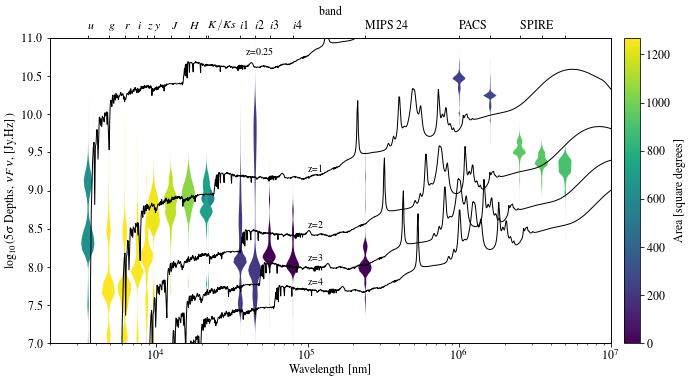

In [112]:
# fake data
fs = 10  # fontsize
# Angstroms     


#data = np.array([np.array(coverage['ferr_ap_{}_mean_min'.format(b)]) for b in bands]).T

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=np.min(areas), vmax=np.max(areas))
scalmap = mpl.cm.ScalarMappable( cmap=cmap, norm=norm)
colors = scalmap.to_rgba(areas)   # The color is the angle
colors[:, 3] = 1

fig, ax = plt.subplots()

ax2 = ax.twiny()

#ax2.set_xlim(3000., 100000)
#ax2.set_xticks(pos)
#ax2.set_xticklabels(['$' + band + '$' for band in bands])
#ax2.set_xlabel('band')
#ax2.set_xscale('log')
ax2.set_xlim(np.log10(2000.), np.log10(10000000))
ax2.set_xticks(np.log10(pos))
ax2.set_xticklabels(['$u$',
 '$g$',
 '$r$',
 '$i$',
 '$z$',
 '$y$',
 '$J$',
 '$H$',
 '  $K/Ks$',
 '',
 '$i1$',
 '$i2$',
 '$i3$',
 '$i4$',
 'MIPS 24',
 r'$\;$   PACS',
 '',
 r'SPIRE',
 '',
 ''], ha='left')
ax2.set_xlabel('band')
#ax2.tick_params(axis="x",left="off",labelleft="on")
#ax2.set_xscale('log')


line_styles = [':', '-.', '--', '-']
colours = ['y', 'b', 'g', 'r', 'k']
for n, z in enumerate([0.25, 1, 2, 3, 4]):
    sed = s.copy()
    mod = get_module("redshifting", redshift=z)
    mod.process(sed)
    ax.plot(sed.wavelength_grid*10, 
            np.log10((3.e8/ (sed.wavelength_grid*1.e-9))*sed.fnu * 1.e-3),
            c='k',
            #c= colours[n],
            #linestyle = line_styles[n],
            label= 'z = {}'.format(z),
            linewidth=1.0,
            alpha=1.
           )
    for m, band in enumerate(cigale_filternames):
        continue
        if m == 0:
            lab = 'z = {}'.format(z)
        else:
            lab=None
        ax.plot([fwhms[m][0], fwhms[m][1]], [np.log10(gal_fluxes[n, m]   )-3, 
                                     np.log10(gal_fluxes[n, m]   )-3], 
               # c='k',
                c= colours[n],
               #linestyle = line_styles[n],
               label=lab,
                alpha=1.0
               )

        






#ax.set_xticks(pos)
#ax.set_xticklabels(['${}$'.format(band.replace('Ks', '').replace('K', 'K/Ks')) for band in bands])
ax.set_xlim(2000., 10000000)
ax.set_xscale('log')    
ax.set_xlabel('Wavelength [nm]')
ax.set_ylim(7, 11)
#ax.legend(loc=2)


#widths
log_widths = np.ones(len(pos)) * (pos) * .2# * widths
#log_widths = np.ones(len(pos)) * 1000.
#areas/np.max(areas)
parts = ax.violinplot(np.log10(3.e8/ (np.array(pos)*1.e-9)) +np.array(data), 
                      positions=pos, 
                      widths=log_widths, 
                      showmeans=False, 
                      showmedians=False, #widths=widths,
        showextrema=False)

for n, part in enumerate(parts['bodies']):
    part.set_facecolor(colors[n])
    part.set_alpha(1.0)

cax, _ = mpl.colorbar.make_axes([ax, ax2], fraction=0.03,anchor=(-1.5,0.5), pad=0.)
n_ticks = 7
values = np.linspace(0,1200, n_ticks)
ticks = values/np.max(areas)

cbar = mpl.colorbar.ColorbarBase(cax, cmap=cmap, ticks = ticks)
cax.set_yticklabels([int(d) for d in values])
cbar.set_label('Area [square degrees]')



plt.figtext(0.38, 0.84, 'z=0.25')
plt.figtext(0.46, 0.55, 'z=1')
plt.figtext(0.46, 0.41, 'z=2')
plt.figtext(0.46, 0.33, 'z=3')
plt.figtext(0.46, 0.27, 'z=4')
#plt.figtext(0.9, 1.1, 'PACS')




#plt.rc('font', family='serif', serif='Times')
#plt.rc('text', usetex=True)
#plt.rc('font',**{'family':'serif','serif':['Palatino']})
#plt.rcParams['pdf.fonttype'] = 42
plt.rc('font', family='serif', serif='Times')
plt.rc('text') #, usetex=True)
ax.set_ylabel(r'log$_{10}$(5$\sigma$ Depths, $\nu F\nu$, [Jy.Hz] )')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

#fig.suptitle("Violin Plotting Examples")
#fig.subplots_adjust(hspace=0.4)
#plt.ylim(-10,10)
column_width_cm = 8.9
width_cm = 3.0 * column_width_cm
height_cm = width_cm / 1.9
width_inches = width_cm/2.5
height_inches = height_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)
plt.savefig('./figs/band_depths_overviews_areaweighted_with_black_seds_wave.pdf', bbox_inches='tight')
plt.savefig('./figs/band_depths_overviews_areaweighted_with_black_seds_wave.png', bbox_inches='tight')

# Make cumulative 1 d depths for MIPS, PACS, SPIRE

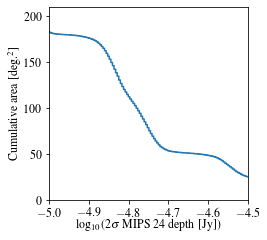

In [114]:


fig, ax = plt.subplots()

#good = np.log10(np.array(g_table['ferr_g_min'])*1.e-6) > -20
#good &= np.log10(np.array(g_table['ferr_g_min'])*1.e-6) <20

mips_pix_mag_depths = np.array(np.log10(depths['ferr_mips_24_mean']*1.e-6 ))
cells, fluxes = np.histogram(mips_pix_mag_depths[~np.isnan(mips_pix_mag_depths)], bins=1000)
cells =np.flip(cells)
fluxes = np.flip(fluxes)

ax.plot(fluxes[1:],
         np.cumsum(cells)*200./cells.sum() ,
        drawstyle='steps')

ax.set_xlabel(r'log$_{10}$(2$\sigma$ MIPS 24 depth [Jy]) ')
ax.set_ylabel('Cumulative area [deg.$^2$]')
ax.set_xlim([-5,-4.5])
ax.set_ylim([0,210])
#y_vals = ax.get_yticks()
#ax.set_yticklabels([n for n in y_vals])



plt.rc('font', family='serif', serif='Times')
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 1.0 * column_width_cm
hieght_cm = width_cm 
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)


plt.savefig('./figs/mips_cumulative_area_depth.pdf', bbox_inches='tight')
plt.savefig('./figs/mips_cumulative_area_depth.png', bbox_inches='tight')

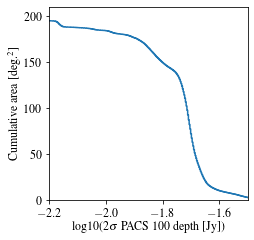

In [115]:


fig, ax = plt.subplots()

#good = np.log10(np.array(g_table['ferr_g_min'])*1.e-6) > -20
#good &= np.log10(np.array(g_table['ferr_g_min'])*1.e-6) <20

pacs_pix_mag_depths = np.array(np.log10(depths['ferr_pacs_green_mean']*1.e-6 ))
cells, fluxes = np.histogram(pacs_pix_mag_depths[~np.isnan(pacs_pix_mag_depths)], bins=1000)
cells =np.flip(cells)
fluxes = np.flip(fluxes)

ax.plot(fluxes[1:],
         np.cumsum(cells)*200./cells.sum() ,
        drawstyle='steps')

ax.set_xlabel('log10(2$\sigma$ PACS 100 depth [Jy]) ')
ax.set_ylabel('Cumulative area [deg.$^2$]')
ax.set_xlim([-2.2,-1.5])
ax.set_ylim([0,210])
#y_vals = ax.get_yticks()
#ax.set_yticklabels([n for n in y_vals])



plt.rc('font', family='serif', serif='Times')
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 1.0 * column_width_cm
hieght_cm = width_cm 
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)


plt.savefig('./figs/pacs_cumulative_area_depth.pdf', bbox_inches='tight')
plt.savefig('./figs/pacs_cumulative_area_depth.png', bbox_inches='tight')

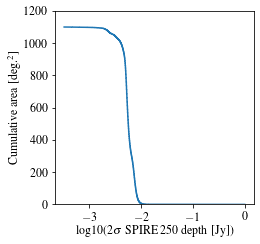

In [133]:


fig, ax = plt.subplots()

#good = np.log10(np.array(g_table['ferr_g_min'])*1.e-6) > -20
#good &= np.log10(np.array(g_table['ferr_g_min'])*1.e-6) <20

spire_pix_mag_depths = np.array(np.log10(depths['ferr_spire_250_mean']*1.e-6 ))
cells, fluxes = np.histogram(spire_pix_mag_depths[~np.isnan(spire_pix_mag_depths)], bins=1000)
cells =np.flip(cells)
fluxes = np.flip(fluxes)

ax.plot(fluxes[1:],
         np.cumsum(cells)*1100./cells.sum() ,
        drawstyle='steps')

ax.set_xlabel('log10(2$\sigma$ SPIRE 250 depth [Jy])')
ax.set_ylabel('Cumulative area [deg.$^2$]')
#ax.set_xlim([-2.2,-1.5])
ax.set_ylim([0,1200])
#y_vals = ax.get_yticks()
#ax.set_yticklabels([n for n in y_vals])



plt.rc('font', family='serif', serif='Times')
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 1.0 * column_width_cm
hieght_cm = width_cm 
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)


plt.savefig('./figs/spire_cumulative_area_depth.pdf', bbox_inches='tight')
plt.savefig('./figs/spire_cumulative_area_depth.png', bbox_inches='tight')

In [136]:
(np.sum(depths['ferr_spire_350_mean']>0)/len(depths)*1270)

957.693724036135

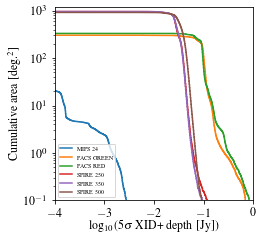

In [277]:


fig, ax = plt.subplots()

#good = np.log10(np.array(g_table['ferr_g_min'])*1.e-6) > -20
#good &= np.log10(np.array(g_table['ferr_g_min'])*1.e-6) <20

for b in [r'mips_24',r'pacs_green',r'pacs_red',r'spire_250',r'spire_350',r'spire_500']:
    pix_mag_depths = np.array(np.log10(depths['ferr_{}_mean'.format(b)]*5.e-6 ))
    cells, fluxes = np.histogram(pix_mag_depths[~np.isnan(pix_mag_depths)], range=[-6,0],bins=1000)
    cells =np.flip(cells)
    fluxes = np.flip(fluxes)

    ax.plot(fluxes[1:],
         np.cumsum(cells)*(np.sum(depths['ferr_{}_mean'.format(b)]>0)/len(depths)*1270)/cells.sum() ,
        drawstyle='steps', label=b.upper().replace('_',' '),alpha=1.)



ax.set_xlabel('log$_{10}$(5$\sigma$ XID+ depth [Jy])')
ax.set_ylabel('Cumulative area [deg.$^2$]')
ax.set_xlim([-4,-0.])
ax.set_ylim([0.1,1200])
#y_vals = ax.get_yticks()
#ax.set_yticklabels([n for n in y_vals])
ax.set_yscale('log')
ax.legend(loc=3, prop={'size': 6})

plt.rc('font', family='serif', serif='Times')
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 1.0 * column_width_cm
hieght_cm = width_cm 
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)


plt.savefig('./figs/fir_cumulative_area_depth.pdf', bbox_inches='tight')
plt.savefig('./figs/fir_cumulative_area_depth.png', bbox_inches='tight')

# 2d depth plots

Make a cumulative 2d area that is at least as deep.

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
           0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
           0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   1.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,
           0.,   1.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
           1.,   0.,   2.,   1.,   1.,   0.,   1.,   0.,   0.,   2.,   0.,
           1.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
           1.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,
           0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           1.,   0.,   1.,   1.,   

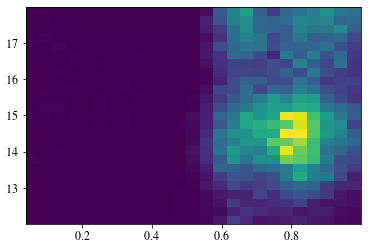

In [153]:
fig, ax = plt.subplots()
good = ~np.isnan(depths['ferr_irac_i1_mean']) & ~np.isnan(depths['ferr_mips_24_mean'])
good &= depths['ferr_irac_i1_mean'] < 1.
good &= depths['ferr_mips_24_mean'] > 12.
good &= depths['ferr_mips_24_mean'] < 18.
ax.hist2d(depths['ferr_irac_i1_mean'][good],depths['ferr_mips_24_mean'][good],  bins=25)


In [164]:
good &= depths['ferr_irac_i1_mean'] < 1.
good &= depths['ferr_mips_24_mean'] > 12.
good &= depths['ferr_mips_24_mean'] < 18.

hist = np.histogram2d(depths['ferr_irac_i1_mean'][good],depths['ferr_mips_24_mean'][good],  bins=25)
hist

(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
           0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
           0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   1.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,
           0.,   1.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
           1.,   0.,   2.,   1.,   1.,   0.,   1.,   0.,   0.,   2.,   0.,
           1.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
           1.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,
           0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           1.,   0.,   1.,   1.,   

In [165]:
from pymoc import MOC
t_moc = MOC(10, [depths['hp_idx_O_10'][0] ])
t_moc.area_sq_deg

0.0032784908016061202

In [254]:
depths['ferr_kks_mean'] = depths['ferr_k_mean']
ks_deeper = depths['ferr_ks_mean']<depths['ferr_k_mean']
depths['ferr_kks_mean'][ks_deeper] = depths['ferr_ks_mean'][ks_deeper]

In [261]:
dict({n:str(n) for n in [1,2,3]})

{1: '1', 2: '2', 3: '3'}

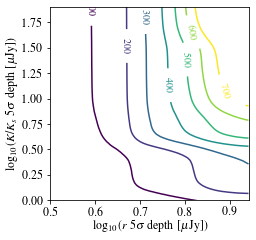

In [271]:
band1 = 'ferr_r_mean'
band2 = 'ferr_kks_mean'
band1 = [band1,np.nanpercentile(depths[band1],0),np.nanpercentile(depths[band1],95)]
band2 = [band2,np.nanpercentile(depths[band2],0),np.nanpercentile(depths[band2],95)]
#good = ~np.isnan(en1_d[band1[0]] ) & ~np.isnan(en1_d[band2[0]] )

good = depths[band1[0]] > band1[1]
good &= depths[band1[0]] < band1[2]
good &= depths[band2[0]] > band2[1]
good &= depths[band2[0]] < band2[2]

hist = np.histogram2d(np.log10(5*depths[band1[0]][good]),np.log10(5*depths[band2[0]][good]),  bins=1000)
vals = hist[0].copy() * t_moc.area_sq_deg
#vals = np.flip(np.cumsum(np.cumsum(np.flip(vals), axis=0),axis=1))
vals = np.cumsum(np.cumsum(vals, axis=0),axis=1)
fig, ax = plt.subplots()


CS = ax.contour(hist[1][:-1] + (hist[1][1]-hist[1][0])/2, 
                hist[2][:-1] + (hist[2][1]-hist[2][0])/2, 
                vals,
                levels = [100,200,300,400,500,600,700]#,
                #fmt ={60.:'60',80.:'80',100.:'100',120.:'120',140.:'140'}
               )
ax.clabel(CS, CS.levels, inline=True#, 
          ,fmt=dict({n:str(n).split('.')[0] for n in CS.levels}), fontsize=10)
#ax.set_xlim([0.05, .07075])
#ax.set_ylim([0.3, 1.1])

ax.set_xlabel('log$_{10}$($r$ $5\sigma$ depth [$\mu$Jy])')
ax.set_ylabel('log$_{10}$($K$/$K_s$ $5\sigma$ depth [$\mu$Jy])')
ax.set_xlim([0.5, 1.*np.log10(5*band1[2])])
ax.set_ylim([0, 1.*np.log10(5*band2[2])])

plt.rc('font', family='serif', serif='Times')
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 1.0 * column_width_cm
hieght_cm = width_cm 
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)

plt.savefig('./figs/2d_r_k_depth.pdf', bbox_inches='tight')
plt.savefig('./figs/2d_r_k_depth.png', bbox_inches='tight')

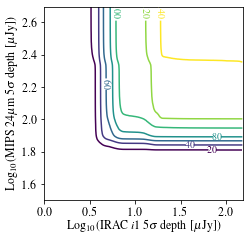

In [268]:
band1 = 'ferr_irac_i1_mean'
band2 = 'ferr_mips_24_mean'

band1 = [band1,np.nanpercentile(depths[band1],0),np.nanpercentile(depths[band1],95)]
band2 = [band2,np.nanpercentile(depths[band2],0),np.nanpercentile(depths[band2],95)]
#good = ~np.isnan(en1_d[band1[0]] ) & ~np.isnan(en1_d[band2[0]] )
good = depths[band1[0]] > band1[1]
good &= depths[band1[0]] < band1[2]
good &= depths[band2[0]] > band2[1]
good &= depths[band2[0]] < band2[2]

hist = np.histogram2d(np.log10(5*depths[band1[0]][good]),np.log10(5*depths[band2[0]][good]),  bins=1000)
vals = hist[0].copy() * t_moc.area_sq_deg
#vals = np.flip(np.cumsum(np.cumsum(np.flip(vals), axis=0),axis=1))
vals = np.cumsum(np.cumsum(vals, axis=0),axis=1)
fig, ax = plt.subplots()


CS = ax.contour(hist[1][:-1] + (hist[1][1]-hist[1][0])/2, 
                hist[2][:-1] + (hist[2][1]-hist[2][0])/2, 
                vals,
                levels = [20,40,60,80,100,120,140]#,
                #fmt ={60.:'60',80.:'80',100.:'100',120.:'120',140.:'140'}
               )
ax.clabel(CS, CS.levels, inline=True,inline_spacing=0,
          fmt=dict({n:str(n).split('.')[0] for n in CS.levels})
          , fontsize=10)
#fig.colorbar(CS, ax=ax, shrink=0.9)
ax.set_xlim([0, 1.*np.log10(5*band1[2])])
ax.set_ylim([1.5, 1.*np.log10(5*band2[2])])

#ax.set_yscale('log')
#ax.set_xscale('log')

ax.set_xlabel('Log$_{10}$(IRAC $i1$ $5\sigma$ depth [$\mu$Jy])')
ax.set_ylabel('Log$_{10}$(MIPS 24$\mu$m $5\sigma$ depth [$\mu$Jy])')


plt.rc('font', family='serif', serif='Times')
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 1.0 * column_width_cm
hieght_cm = width_cm 
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)

plt.savefig('./figs/2d_i1_mips_depth.pdf', bbox_inches='tight')
plt.savefig('./figs/2d_i1_mips_depth.png', bbox_inches='tight')

In [269]:
np.sum(vals)

37042970.54708918

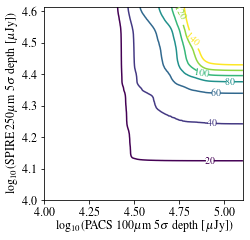

In [273]:
band1 = 'ferr_pacs_green_mean'
band2 = 'ferr_spire_250_mean'
band1 = [band1,np.nanpercentile(depths[band1],0),np.nanpercentile(depths[band1],95)]
band2 = [band2,np.nanpercentile(depths[band2],0),np.nanpercentile(depths[band2],95)]
good = depths[band1[0]] > band1[1]
good &= depths[band1[0]] < band1[2]
good &= depths[band2[0]] > band2[1]
good &= depths[band2[0]] < band2[2]

hist = np.histogram2d(np.log10(5*depths[band1[0]][good]),np.log10(5*depths[band2[0]][good]),  bins=1000)
vals = hist[0].copy() * t_moc.area_sq_deg
#vals = np.flip(np.cumsum(np.cumsum(np.flip(vals), axis=0),axis=1))
vals = np.cumsum(np.cumsum(vals, axis=0),axis=1)
fig, ax = plt.subplots()


CS = ax.contour(hist[1][:-1] + (hist[1][1]-hist[1][0])/2, 
                hist[2][:-1] + (hist[2][1]-hist[2][0])/2, 
                vals,
                levels = [20,40,60,80,100,120,140]#,
                #fmt ={60.:'60',80.:'80',100.:'100',120.:'120',140.:'140'}
               )
ax.clabel(CS, CS.levels, inline=True,inline_spacing=0,
          fmt=dict({n:str(n).split('.')[0] for n in CS.levels})
          , fontsize=10)
#fig.colorbar(CS, ax=ax, shrink=0.9)
ax.set_xlim([4, 1.*np.log10(5*band1[2])])
ax.set_ylim([4, 1.*np.log10(5*band2[2])])

ax.set_xlabel('log$_{10}$(PACS 100$\mu$m 5$\sigma$ depth [$\mu$Jy])')
ax.set_ylabel('log$_{10}$(SPIRE 250$\mu$m 5$\sigma$ depth [$\mu$Jy])')

plt.rc('font', family='serif', serif='Times')
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 1.0 * column_width_cm
hieght_cm = width_cm 
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)

plt.savefig('./figs/2d_pacs_spire_depth.pdf', bbox_inches='tight')
plt.savefig('./figs/2d_pacs_spire_depth.png', bbox_inches='tight')